# Weiterentwicklung: neue Simulation

In diesem Notebook werden Sie die Ausbreitung einer ansteckenden Krankheit simulieren. Die Simulation baut auf dem bisherigen Code des Game of Life auf und verwendet ein sehr ähnliches Modell.

Der Fokus liegt hier aber nicht im Programmieren der neuen Simulation, sondern im Verstehen des Modells, den **zellulären Automaten**, die beiden Simulationen zugrundeliegen sowie auf Simulationen generell.

## 1. Bisherige Simulation: Game of Life

Für das Game of Life haben Sie die Welt in einem zweidimensionalen Raster abgebildet. Zu jedem Zeitpunkt $t$ hatte *jede Zelle* einen *Zustand* (1 für lebend oder 0 für tot). Aus ihrem eigenen Zustand und denjenigen ihrer *acht Nachbarzellen* wurde anhand festgelegter Regeln für jede Zelle der Zustand zum Zeitpunkt $t+1$ ermittelt.

### 1.1. Modell: Zellulärer Automat

Ein solches System nennt man einen **zellulären Automaten**. Zelluläre Automaten eignen sich als *Modelle* für Simulationen von Systemen, die aus einer fixen Anzahl von Elementen (Zellen) bestehen, sich räumlich in einem n-dimensionalen Raum (*Zellularraum*; Welt) darstellen lassen und zyklisch verändern, wobei die Zustandsänderungen für alle Zellen gleichzeitig erfolgen und die Zeitabstände genau definiert sind (durch die *Ticklänge*).

Dabei werden zwei Arten von **Nachbarschaften** unterschieden, die *Moore-Nachbarschaft* mit 8 Nachbarn, wie Sie sie im Game of Life gesehen haben und die *Von-Neumann-Nachbarschaft*, die aus den vier direkt angrenzenden Zellen besteht:

<img src="images/nachbarschaften.png" alt="direkte nachbarn" width="33%"/>

Auch **erweiterte Nachbarschaften** sind möglich. Bei erweiterten Nachbarschaften ist der Radius grösser als eine Zelle. Entsprechend müssen mehr Zellen berücksichtigt werden.

Der Status der Welt zu einem Zeitpunkt $t$ wird **Generation** genannt. Die Berechnung der Generationen erfolgt zyklisch in den Abständen **Ticklänge**.

#### 1.1.1. Aufgabe 1 – Game of Life als zellulärer Automat

Überlegen Sie sich, welche Elemente des zellulären Automaten Sie beim Game of Life gesehen haben.

Ergänzen Sie die folgende Liste.

* Zellularraum: ...
* Zustandsmenge: ...
* Nachbarschaft: ...
* Überführungsfunktion (Regeln): ...

Schreiben Sie ihre Lösung direkt in diese Zelle...

### 1.2. Umsetzung (Code)

Die Umsetzung des Game of Life erfolgte über die beiden Funktionen `iterate(world)` und `display_world(world, number_of_iterations, tick_length=0.4)`. Beide Funktionen nehmen die Welt entgegen, einen zweidimensionalen Array (auch Matrix genannt), der eine Generation (die initiale Welt im Zustand zum Zeitpunkt $t_0$) darstellt.

* `iterate(world)`  
  ermittelt die Folgegeneration (den neuen Zustand der Welt zum Zeitpunkt $t+1$) ausgehend von der durch `world` repräsentierten Generation (Zustand der Welt zum Zeitpunkt $t$). Die Berechnung erfolgt für jede Zelle unter Berücksichtigung des Zustands der Zelle und den Zuständen ihrer acht Nachbarzellen unter Anwendung der Regeln.
* `display_world(world, number_of_iterations, tick_length=0.4)`  
  ist für die Visualisierung zuständig. Ausgehend von der Ausgangsgeneration (`world`) berechnet sie `number_of_iterations` neue Generationen und zeigt diese im Abstand von `tick_length` an.
  
#### 1.2.1. Gesamter Code

In der folgenden Zelle ist der gesamte Code des Game of Life mit einer zufälligen Startgeneration zusammengetragen.

In [ ]:
import numpy as np # NumPy (Numerical Python): Bibliothek für numerische Berechnungen
import matplotlib.pyplot as plt # PyPlot: Bibliothek für Visualisierungen (Plots)
from IPython import display # Jupyter-Notebook-spezifische Bibliothek
import time # Jupyter-Notebook-spezifisch, könnte auch mit PyPlot gelöst werden 

################################################################################
# Berechnung der nächsten Generation (Welt zum Zeitpunkt t+1),                 #
# ausgehend von der übergebenen Generation (Welt zum Zeitpunkt t)              #
# Parameter:                                                                   #
# - world: welt; ein zweidimensionaler Array (eine Matrix);                    #
#          stellt eine Generation dar (die Welt zu einem Zeitpunkt).           #
################################################################################
def iterate(world):
        
    # Kopie des Ausgangszustands machen
    old_world = np.copy(world)
    
    # Höhe und Breite der Welt auslesen
    height = world.shape[0]
    width = world.shape[1]
    
    # Über alle Zellen iterieren (Mit einer Schleife alle Zellen durchgehen)
    for (i,j) in np.ndindex(world.shape): # oder: np.ndindex((height,width))
        
        ########################################################################
        # Berechnung der Anzahl der lebenden Nachbarn (neighbours_alive)       #
        ########################################################################
        
        # Für den Moment definieren Sie, dass Zellen am Rand nie lebende Nachbarn haben.
        if i==0 or j==0 or i==height-1 or j==width-1: 
            neighbours_alive = 0
            
        else: 
            # Für alle anderen Zellen berechnen Sie die Anzahl lebender Nachbarn.
            # Wie kommen Sie zu dieser Summe?
            # Da lebende Zellen den Zustand 1 haben, können Sie die Anzahl lebender
            # Nachbarn einer Zelle (i,j) finden, indem Sie den Teilbereich 
            # von i-1 bis und ohne i+2 und von j-1 bis und ohne j+2 auslesen, 
            # alle Werte aufsummieren und den Wert der Zelle (i,j) von der 
            # ermittelten Summe abziehen, da Sie den Wert der Zelle (i,j) mitgezählt 
            # haben, aber nur die lebenden Nachbarn zählen wollen.
            neighbours_alive = np.sum(old_world[i-1:i+2, j-1:j+2]) - old_world[i,j]
            
            
        #### Alternativ: Zellen an den Rändern sind jeweils benachbart 
        #### (Oberfläche eines "Donuts"):
        # neighbours_alive = old_world[(i-1+height)%height, (j-1+width)%width]
        # neighbours_alive += old_world[(i-1+height)%height, j]
        # neighbours_alive += old_world[(i-1+height)%height, (j+1)%width]
        # neighbours_alive += old_world[i, (j-1+width)%width]
        # neighbours_alive += old_world[i, (j+1)%width]
        # neighbours_alive += old_world[(i+1)%height, (j-1+width)%width]
        # neighbours_alive += old_world[(i+1)%height, j]
        # neighbours_alive += old_world[(i+1)%height, (j+1)%width]

            
        ########################################################################
        # Berechnung des neuen Zustands der Zelle (state)                      #
        ########################################################################

        state = old_world[i,j]
        
        # Anwendung der Regeln
        if(state == 1 and (neighbours_alive < 2 or neighbours_alive > 3)):
            new_state = 0
        elif(state == 0 and neighbours_alive == 3):    
            new_state = 1
        else:
            new_state = state
    
        world[i,j] = new_state

################################################################################
# Visualisierung                                                               #
# Einstiegspunkt der Simulation:                                               #
# Wenn Sie das Game of Life laufen lassen wollen, rufen Sie diese Funktion auf.#
#                                                                              #
# Parameter:                                                                   #
# - welt: zweidimensionaler Array (eine Matrix), der eine Generation (die Welt #
#         zu einem Zeitpunkt) darstellt                                        #
# - number_of_iterations: Anzahl Generationen, die berechnet werden sollen     #
# - tick_length: Zeitabstände in denen die Generationen neu berechnet und      #
#                er zeugt werden. OPTIONAL: wenn tick_length beim Funktions-   #
#                aufruf nichts angegeben wird, wird der Standardwert (Default- #
#                wert) von 0.4 Sekunden verwendet.                             #
################################################################################
def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    for i in range(number_of_iterations):
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # Beschriftung der x- und y-Achsen deaktivieren
        plt.xticks([]), plt.yticks([])
        
        # Anzeige der aktuellen Generation als Titel
        plt.title("Generation: " + str(i+1))
        
        # Welt anzeigen
        plt.imshow(world, cmap=plt.cm.gray_r)
        
        # Plot anzeigen 
        plt.show()
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
                
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)


### 1.3 Simulation

Anwendung am Beispiel einer zufälligen Welt:

In [ ]:
random_world = np.random.randint(0,2,(75,150))

display_world(random_world, number_of_iterations=20, tick_length=0.3)

## 2. Neue Simulation: Verbreitung einer Krankheit

Nachdem Sie den Code des Game of Life verstanden haben, sind Sie dazu gerüstet, selbst eine Simulation zu erstellen. Falls Sie dies mit Hilfe eines Tutorials selbst tun möchten, liegt dafür das Notebook ausbreitung-krankheitserreger-tutorial.ipynb bereit.

In diesem Notebook werden Sie die Verbreitung eines Krankheitserregers (sehr stark vereinfacht) simulieren.

### 2.1. Parameter

* Populationsgrösse: Höhe und Breite (um möglichst viel Code wiederverwerten zu können)
* Initiale Anzahl Infizierter
* Dauer: Anzahl Tage, über welche die Simulation laufen soll.

### 2.2. Modell

Wie das Game of Life lässt sich auch die Verbreitung eines Krankheitserregers mit einem *zellulären Automaten* modellieren.

#### 2.2.1. Aufgabe

Überlegen Sie sich, wie eine Pandemiesimulation in einem zellulären Automaten simuliert werden könnte.

Machen Sie sich Gedanken zu

* Zellularraum: ...
* Zustandsmenge: ...
* Nachbarschaft: ...
* Überführungsfunktion (Regeln): ...

#### 2.2.2. Zellularraum (Welt)

Wie beim Game of Life liegt der Simulation eine zweidimensionale Welt aus Zellen zugrunde. 

Hier könnte es interessanter sein, die Ränder der Welt nicht als Nachbarn zu betrachten (also kein "Donut"). Als kleiner Nebeneffekt lässt sich dadurch (extrem stark vereinfacht) eine geographische Ausbreitung des Erregers beobachten - beispielsweise von Genf (links unten) bis St. Gallen (rechts oben).

#### 2.2.3. Zustandsmenge

Im Gegensatz zum Game of Life haben die Zellen nicht nur zwei Zustände, denn sie können gesund, krank und genesen sein.

Jede Zelle kann die **Zustände 0 bis 8** annehmen:

* Zustand 0: gesund (kann angesteckt werden)
* Zustände 1-7: krank (ist ansteckend)
* Zustand 8: genesen (kann nicht mehr angesteckt werden und ist nicht mehr ansteckend)

#### 2.2.4. Nachbarschaft

Ob eine Zelle angesteckt wird, soll nur von ihren *direkten* Nachbarn abhängen. Betrachten Sie für diese Simulation deshalb lediglich die direkten Nachbarn (Von-Neumann-Nachbarschaft):
<img src="images/nachbarn_direkt.png" alt="direkte nachbarn" width="12.5%"/>

#### 2.2.5. Überführungsfunktion (Ansteckungsregeln)

Es soll einzig die folgende Regel gelten, nach welcher der neue Zustand der Welt berechnet wird:

Eine gesunde Zelle (Status 0) wird *mit einer Wahrscheinlichkeit von 25%* angesteckt, falls mindestens eine (direkte) Nachbarzelle krank (Status 1 bis 7) ist. Die Dauer, während der eine Zelle *ansteckend* (krank) ist, beträgt *eine Woche* (7 Tage). In dieser Zeit wird der Zustand der Zelle jeweils um 1 erhöht.

*Um das Modell zu verbessern, können die Regeln angepasst werden.*

### 2.3. Code

Die folgende Zelle enthält den gesamten Code der Simulation.

Die Funktion `simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)` ist für den Start der Simulation zuständig.

In [2]:
import numpy as np # NumPy: Bibliothek für numerische Berechnungen
import matplotlib.pyplot as plt # PyPlot: Bibliothek für Visualisierungen (Plots)
from IPython.display import display, clear_output # Jupyter-Notebook-spezifisch
import time # Jupyter-Notebook-spezifisch, könnte auch mit PyPlot gelöst werden

################################################################################
# Generation einer Zufallszahl mit einer Wahrscheinlichkeit von 25%            #
# Da Zufallszahlen uniform (gleichmässig) verteilt sind, können Sie hat jede   #
# generierte Zahl eine Wahrscheinlichkeit von 1/4 wenn Sie Zufallszahlen aus   #
# dem Bereich von vier Werten (1 aus {0,1,2,3}) generieren.                    #
################################################################################
def zufallszahl_25p():
    return np.random.randint(0, 4)


################################################################################
# Berechnung der nächsten Generation (Welt zum Zeitpunkt t+1),                 #
# ausgehend von der übergebenen Generation (Welt zum Zeitpunkt t)              #
# Argument:                                                                    #
# - world: Welt; ein zweidimensionaler Array (eine Matrix);                    #
#          stellt eine Generation (die Welt zu einem Zeitpunkt t) dar.         #
################################################################################
def iterate(world):

    # Kopie des Ausgangszustands machen
    old_world = np.copy(world)

    # Ansteckende Zellen markieren
    # Welt vereinfacht darstellen: alle ansteckenden Zellen sollen den Status 1
    # bekommen und alle andern Zellen den Status 0:
    # Zellen mit dem Status 8 sind genesen und nicht mehr ansteckend (-> Status 0)
    world_infectuous = np.where(world == 8, 0, world)
    # Zellen mit dem Status > 0 sind ansteckend (-> Status 1)
    # Der Status 1 muss nicht ersetzt werden, deshalb nur Werte > 1 suchen.
    # (Ihre Werte auf 1 zu setzen, ist im Moment noch nicht nötig...)
    world_infectuous = np.where(world_infectuous > 1, 1, 0)

    # Höhe und Breite der Welt bestimmen
    height = world.shape[0]
    width = world.shape[1]

    # Über alle Zellen iterieren
    for (i,j) in np.ndindex(world.shape):

        ########################################################################
        # Berechnung der Anzahl der infizierten Nachbarn (neighbours_infected) #
        ########################################################################

        # Anzahl ansteckender Nachbarzellen
        # Randzellen nicht anschauen
        neighbours_infectuous = 0
        if i > 0:
            neighbours_infectuous += world_infectuous[i-1, j]
        if i < height-1:
            neighbours_infectuous += world_infectuous[i+1, j]
        if j > 0:
            neighbours_infectuous += world_infectuous[i, j-1]
        if j < width-1:
            neighbours_infectuous += world_infectuous[i, j+1]

        # Oder wenn Sie davon ausgehen würden, dass die Ränder links und rechts
        # bzw. oben und unten benachbart sind:
        # neighbours_infectuous = 0
        # neighbours_infectuous += old_world[(i-1+height)%height, j]
        # neighbours_infectuous += old_world[i, (j-1+width)%width]
        # neighbours_infectuous += old_world[i, (j+1)%width]
        # neighbours_infectuous += old_world[(i+1)%height, j]

        ########################################################################
        # Berechnung des neuen Zustands der Zelle (state)                      #
        ########################################################################

        state = old_world[i,j]

        new_state = state

        # Anwendung der Regeln
        if(state == 0 and neighbours_infectuous > 0 and zufallszahl_25p() == 0):
            new_state = 1
        elif state in range (1,8):
            new_state = state + 1

        world[i,j] = new_state


################################################################################
# Visualisierung                                                               #
# Argumente:                                                                   #
# - welt: zweidimensionaler Array (eine Matrix)                                #
#         stellt eine Generation (die Welt zu einem Zeitpunkt t) dar           #
# - number_of_iterations: Anzahl Generationen, die berechnet werden sollen     #
# - tick_length: Zeitabstände in denen die Generationen neu berechnet und      #
#                er zeugt werden. OPTIONAL: wenn tick_length beim Funktions-   #
#                aufruf nichts angegeben wird, wird der Standardwert (Default- #
#                wert) von 0.4 Sekunden verwendet.                             #
################################################################################
def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)  
    
    # Vorbereitungen für die Anzeige der drei Plots
    # Für den Plot ein Figureobjekt definieren
    # (Sie können sich die Figure wie einen Platzhalter für den Plot vorstellen)
    figure = plt.figure(figsize=(15, 5))

    # 3 (Sub)plots nebeneinander in der figure definieren
    ax1 = figure.add_subplot(1, 3, 1)  # 1. Subplot (Welt) # 1 Zeile, 3 Spalten, der 1. Graph
    ax2 = figure.add_subplot(1, 3, 2)  # 1. Subplot (Welt) # 1 Zeile, 3 Spalten, der 2. Graph
    ax3 = figure.add_subplot(1, 3, 3)  # 1. Subplot (Welt) # 1 Zeile, 3 Spalten, der 3. Graph  
    
    for i in range(number_of_iterations):
        
        # Anzahl gesunder, kranker und genesener Zellen ermitteln
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # Die 3 Sublots zeichnen #

        # 1. Subplot (Welt)
        # Welt darstellen
        # Zuerste den alten Subplot löschen
        ax1.clear()
        # keine Beschriftung der x- und y-Achsen
        ax1.set_xticks([]), ax1.set_yticks([])
        # Welt zeichnen
        img = ax1.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8)
        # Farblegende zum Subplot definieren (als Teil der Figure nur einmal nötig)
        if i == 0:
            figure.colorbar(img, ax=ax1)            

        ## 2. Subplot (Linien)
        # Linien zeichnen
        # Zuerst das alte Diagramm leeren, anschliessend die Linien neu zeichnen
        ax2.clear()
        ax2.plot(gesund, 'tab:blue', label='gesund')
        ax2.plot(krank, 'tab:red', label='krank')
        ax2.plot(genesen, 'tab:green', label='genesen')
        # Legende anzeigen
        ax2.legend()

        ## 3. Subplot (Gestapelte Balken)
        # Balkenindex
        bar_index = np.arange(number_of_iterations)
        # Balkenbreite (1 bedeutet: bis zum näcnsten Balken)
        bar_width = 1
        # Balken zeichnen
        # der Parameter bottom steht für den Wert am unteren Rand des Balkens
        # Zuerst das alte Diagramm leeren, anschliessend die Balken neu zeichnen
        ax3.clear()
        ax3.bar(bar_index, krank, bar_width, label='krank', color='red')
        ax3.bar(bar_index, genesen, bar_width, label='genesen', bottom=krank, color='green')
        ax3.bar(bar_index, gesund, bar_width, label='gesund', bottom=krank+genesen, color='blue')

        # Titel der Figure definieren (den 3 Subplots übergeordnet)
        if i == 0:
            figure.suptitle("Tag: " + str(i+1)
                            + " (gesund: " + str((world == 0).sum())
                            + ", krank: " + str((world < 8).sum()-(world == 0).sum())
                            + ", genesen: " + str((world == 8).sum()) + ")")

        # -----------------------------------

        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)

        # Anzeige des Plots (ausserhalb von Jupyter; wäre hier aber auch "erlaubt")
        display(figure)
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        clear_output(wait=True)

        # Warten (tick_length Sekunden)
        time.sleep(tick_length)
        

################################################################################
# Erstellung einer neuen Welt                                                  #
#                                                                              #
# Gibt eine Welt (zweidimensionaler Array aus Integern) mit der Dimension      #
# hoehe Mal breite zurück, in der anzahl_infizierte einen Wert von 1 bis 7     #
# haben, und die restlichen Zellen haben den Wert 0.                           #
#                                                                              #
# Argumente:                                                                   #
# - hoehe und breite: Dimension der Welt                                       #
# - anzahl_infizierte: Anzahl Kranze am Anfang der Simulation                  #
################################################################################
def neue_welt(hoehe, breite, anzahl_infizierte):
    welt = np.zeros((hoehe, breite), int)

    while anzahl_infizierte > 0:
        rand_j = np.random.randint(0, breite)
        rand_i = np.random.randint(0, hoehe)
        if welt[rand_i, rand_j] == 0:
            welt[rand_i, rand_j] = np.random.randint(1,8)
            anzahl_infizierte -= 1 # anzahl_infizierte um 1 verkleinern

    return welt


################################################################################
# Definition der Funktion simuliere_ausbreitung                                #
# erstellt eine Population einer gegebenen Dimension                           #
# mit einer gegebenen Anzahl Infizierter (Ansteckender)                        #
# und visualisiert die Simulation über eine gegebene Anzahl Tage               #
#                                                                              #
# Argumente (Parameter der Simulation):                                        #
# - hoehe und breite: Dimension der Welt                                       #
# - anzahl_infizierte: Anzahl Kranze am Anfang der Simulation                  #
# - anzahl_tage: Anzahl Generationen, die berechnet werden sollen              #
# - tick_laenge*: Anzeigegeschwindigkeit; Zeitabstände in denen die Generati-  #
#                 onen neu berechnet und erzeugt werden (analog tick_length    #
#                 aus dem Game of Life).                                       #
#                 *OPTIONAL: wenn beim Funktionsaufruf keine Ticklänge angege- #
#                 ben wird, wird der Standardwert (Defaultwert) von 0.2 Sekun- #
#                 den verwendet.                                               #
################################################################################
def simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage, tick_laenge=0.2):
    welt = neue_welt(hoehe, breite, anzahl_infizierte)
    display_world(welt, anzahl_tage, tick_length=tick_laenge)

### 2.4. SIMULATION DER AUSBREITUNG EINES KRANKHEITSERREGERS

#### Parameter der Simulation
* `hoehe` und `breite`: Dimension der Welt
* `anzahl_infizierte`: Anzahl Kranze am Anfang der Simulation
* `anzahl_tage`: Anzahl Generationen, die berechnet werden sollen
* `tick_laenge`: Anzeigegeschwindigkeit (optional)  
  Zeitabstände in denen die Generationen neu berechnet und erzeugt werden  
  (analog tick_lengthaus dem Game of Life).
  Der Parameter ist optional: wenn beim Funktionsaufruf keine Ticklänge angegeben wird, 
  wird der Standardwert (Defaultwert) von 0.2 Sekunden verwendet.

#### Simulation starten

```Python
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage, tick_laenge)
```

#### 2.4.1 Simulieren

Nun können Sie Ihre Simulation laufen lassen, die einzelnen Parameter verändern und beobachten, welchen Effekt diese haben.

Gehen Sie bei anfänglich von einer Population von 2000 Individuen aus (50x40 Zellen) und 20 Infizierten, was einer initialen Infektionsrate von 10 Promille (1 Prozent) entspricht. Simuliert wird über 7 Wochen (49 Tage).

Wie lange geht es, bis Ihre Population durchseucht ist? Gibt es Individuen (Zellen), die nicht infiziert werden?

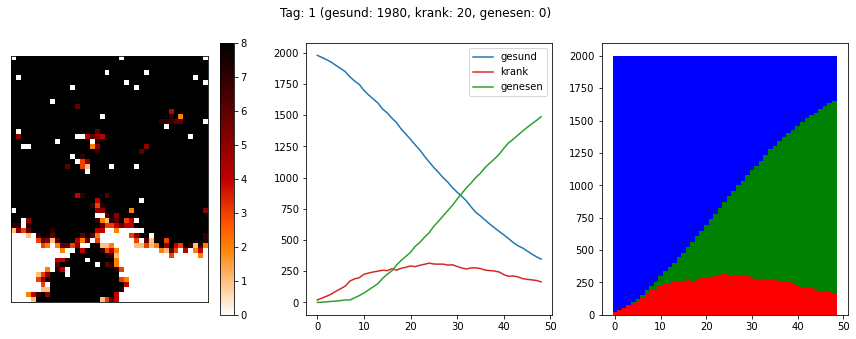

In [3]:
# Parameter Ihrer Simulation

hoehe = 50 
breite = 40 
anzahl_infizierte = 20
anzahl_tage = 49
tick_laenge=0.05

simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

Sie können nun die Parameter ändern, die Simulation laufen lassen und beobachten, welchen Effekt die Parameter haben.

In [ ]:
# Parameter Ihrer Simulation

hoehe = 50 
breite = 40 
anzahl_infizierte = 2
anzahl_tage = 49

simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

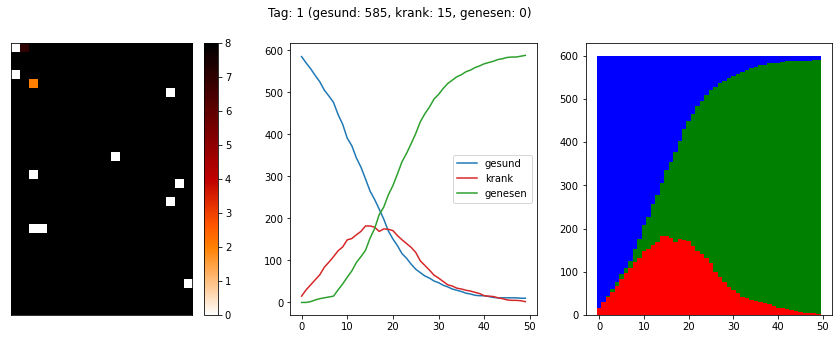

In [4]:
hoehe = 30
breite = 20
anzahl_infizierte = 15
anzahl_tage = 50
tick_laenge = 0.1 # optional, Sie können die Funktion auch ohne
                 # tick_laenge aufrufen, dann wird display_world
                 # mit dem Standardwert 0.2 Sekunden aufgerufen.

# Simulation starten
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage, tick_laenge)

In [ ]:
hoehe = 50
breite = 40 
anzahl_infizierte = 20
anzahl_tage = 50

simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

Dieses Modell ist stark vereinfacht. Im richtigen Leben gibt es zahlreiche Validierungs- und Überarbeitungsphasen. Die Modelle werden auf der Basis der erhobenen Daten laufend angepasst und verbessert.

Hier könnten Sie mit der Ansteckungswahrscheinlichkeit experimentieren oder Sie könnten neue Stati definieren.

## 3. Weitere Simulationen

Schauen Sie sich ein(ig)e der folgenden Simulationen an. 

Unter Model Info -> HOW TO USE IT finden Sie Informationen zu den wichtigsten Parametern der Modelle und teilweise auch Fragestellungen. Versuchen Sie herauszufinden, was die einzelnen Parameter oder deren Kombination bewirken.

* [Klimawandel](http://netlogoweb.org/launch#http://netlogoweb.org/assets/modelslib/Sample%20Models/Earth%20Science/Climate%20Change.nlogo)
* [Ansteckungen](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Disease%20Solo.nlogo)
* [Wölfe und Schafe](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Wolf%20Sheep%20Predation.nlogo)
* [Ameisenstrasse](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Ant%20Lines.nlogo)
* [Herbst](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Autumn.nlogo)
* [Vogelschwarm](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Flocking.nlogo)
* [Wölfe und Schafe](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Evolution/Wolf%20Sheep%20Stride%20Inheritance.nlogo)
* [Sand](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Chemistry%20&%20Physics/Sand.nlogo)
* [Mergesort](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Computer%20Science/Unverified/Merge%20Sort.nlogo)
* [Sortieralgorithmen Übersicht](https://www.toptal.com/developers/sorting-algorithms)


## 4. Abschluss Simulationen

Erinnern Sie sich an die Grafik aus der ersten Lektion. 

Eine Simulation besteht aus einem *Modell*, verschiedenen *Parametern* und einer optionalen *Visualisierung*. Das *Simulieren* geschieht in drei Phasen, dem *Modellieren* (und *Validieren*), dem *Visualisieren* und dem *Interpretieren*. 

<img src="images/simulation_teile.png" alt="simulation_teile" width="25%"/>

Ausgehend von einer Fragestellung wird die Welt im **Modell** vereinfacht abgebildet. Verschiedene Parameter haben Einfluss auf das System. Durch Verändern der **Parameter** ändert sich das Verhalten des Systems, woraus **Erkenntnisse** gewonnen werden können. 

Das **Modell** ist bei einer Simulation die grösste Herausforderung. Es muss überprüft und gegebenenfalls angepasst werden, um genauer zu werden (**Validierung**). Dazu ist es nötig, dass genügend Daten zur Verfügung stehen. *Der schwierigste Teil einer Simulation besteht in der Definition eines passenden, aussagekräftigen und gültigen Modells.*

Mittels **Visualisierungen** werden die Sachverhalte sichtbar gemacht. Visualisierungen sind für eine Simulation zwar nicht unbedingt nötig, sind aber häufig hilfreich.

### 4.1. Was Sie gelernt haben

Neben der Simulation haben Sie auch fortgeschrittene Einblicke ins Programmieren bekommen.

Sie haben

* mit der Bibliothek NumPy *zweidimensionale Arrays* erstellt, initialisiert und manipuliert, um fürs Game of Life Anfangsgenerationen zu definieren,
* mit der Bibliothek Matplotlib zweidimensionale Arrays *visualisiert*,
* mit *fremdem Code* gearbeitet und um ihn zu *verstehen* die Dokumentation verwendet, Funktionsaufrufe auskommentiert, Elemente mit der `print`-Funktion untersucht oder deren Parameter geändert und beobachtet, was passiert,
* *Tupel* angetroffen, die Sie bisher eher selten verwendet haben (Beispiel: Koordinatenpaare (i,j))
* und sind mit dem *Slicing* mit Hilfe des *Teilbereichsoperators* vertrauter geworden.

Überdies haben Sie Jupyter Notebooks kennengelernt, die Ihnen möglicherweise im Studium wieder begegnen werden.

#### Quellen
* Basis Code Game of Life: [julienmesselier auf GitHub](https://github.com/julienmesselier/game-of-life)
* Idee mit Ansteckungswahrscheinlichkeit: Lukas Fässler, David Sichau, 2020: [E.Tutorial: Programmieren mit Python, Modul 4](https://et.lecturers.inf.ethz.ch/viewer/module/Hi9Cyq9RkwLMmSPKT?course_id=b6wSvFsS8ydmuZ7R2&module_locale_key=de), ETH Zürich
* Daniel Shiffman: [The Nature of Code](https://natureofcode.com/book/chapter-7-cellular-automata/), [YouTube-Kanal: The Coding Train](https://www.youtube.com/channel/UCvjgXvBlbQiydffZU7m1_aw)
* Dokumentationen von [NumPy](https://numpy.org/doc/1.21/reference/index.html) und [Matplotlib](https://matplotlib.org/stable/contents.html)
* zusätzliche Simulationen: Wilensky, U. (1999). NetLogo. [http://ccl.northwestern.edu/netlogo/](http://ccl.northwestern.edu/netlogo/). Center for Connected Learning and Computer-Based Modeling, Northwestern University, Evanston, IL.)

Alessandra Donzé, September 2021